# CaCl2 Titrationen mit K(I) background

In [1]:
import b_lab_functions as blab
import main as main
import pandas as pd
#from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import seaborn as sns
from scipy import optimize
import matplotlib.gridspec as gridspec
import os

In [2]:
def rgb_to_hex(rgb):# hier kann ich direkt die Farben aus Inkscape eintragen und bekommen ienen colorcode mit #123456 raus
    """
    Convert an RGB color value to a hex color code.

    :param rgb: A tuple of red, green, and blue (each in the range 0-255)
    :return: A string representing the hex color code
    """
    r, g, b = rgb
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

In [3]:
# farbskala definieren fuer 3D Plots
my_gradient_blue = LinearSegmentedColormap.from_list('my_gradient_blue', (
    # Edit this gradient at https://eltos.github.io/gradient/#2B2D6F-1D3E6A-376993-4480A1-5C94AC
    (0.000, (0.169, 0.176, 0.435)),
    (0.250, (0.329, 0.443, 0.596)),
    (0.500, (0.510, 0.616, 0.706)),
    (0.750, (0.635, 0.780, 0.859)),
    (1.000, (0.800, 0.894, 0.937))))

In [4]:
data_CaCl2_K = pd.read_csv("2024-05-22_CaCl2_K_melting.csv")

In [5]:
#DAS HIER IST DIE LSG
data_CaCl2_K['c (mM)'] = data_CaCl2_K['Name'].str.split(' ').str[0]

#data_CaCl2_K['c [mM]'] = data_CaCl2_K['Name'].str[:2]
data_CaCl2_K['c (mM)'] = data_CaCl2_K['c (mM)'].astype(float)
data_CaCl2_K

,Temperature (C),Abs,Measurement,Name,norm_Abs,dabs_dt,c (mM)
0,90.000000,0.348241,1,50 mM CaCl2_260.00nm_90.0-21.0C,0.082460,0.082460,50.0
1,89.000000,0.345350,1,50 mM CaCl2_260.00nm_90.0-21.0C,0.000000,-0.049318,50.0
2,88.000000,0.351700,1,50 mM CaCl2_260.00nm_90.0-21.0C,0.181095,-0.159575,50.0
3,87.000000,0.356540,1,50 mM CaCl2_260.00nm_90.0-21.0C,0.319150,-0.113622,50.0
4,86.000000,0.359668,1,50 mM CaCl2_260.00nm_90.0-21.0C,0.408340,-0.059901,50.0
...,...,...,...,...,...,...,...
3915,86.000000,0.301200,12,25 mM CaCl2_260.00nm_21.0-90.0C_R1,0.934880,0.016930,25.0
3916,87.000000,0.302097,12,25 mM CaCl2_260.00nm_21.0-90.0C_R1,0.952693,0.017469,25.0
3917,88.000000,0.302959,12,25 mM CaCl2_260.00nm_21.0-90.0C_R1,0.969817,0.016731,25.0
3918,89.000000,0.303782,12,25 mM CaCl2_260.00nm_21.0-90.0C_R1,0.986156,0.018361,25.0


In [6]:
result = data_CaCl2_K.loc[data_CaCl2_K['c (mM)'] == 0.1]

print(result)

      Temperature (C)       Abs  Measurement  \
1960        90.000000  0.351414           13   
1961        89.000000  0.351892           13   
1962        88.000000  0.351832           13   
1963        87.000000  0.352369           13   
1964        86.000000  0.352353           13   
...               ...       ...          ...   
2235        86.000000  0.371232           16   
2236        87.000000  0.371949           16   
2237        88.000000  0.372707           16   
2238        89.000000  0.373395           16   
2239        89.699997  0.373829           16   

                                     Name  norm_Abs   dabs_dt  c (mM)  
1960     0.1 mM CaCl2_260.00nm_90.0-21.0C  0.983441 -0.008282     0.1  
1961     0.1 mM CaCl2_260.00nm_90.0-21.0C  0.991723 -0.003620     0.1  
1962     0.1 mM CaCl2_260.00nm_90.0-21.0C  0.990682 -0.004139     0.1  
1963     0.1 mM CaCl2_260.00nm_90.0-21.0C  1.000000 -0.004515     0.1  
1964     0.1 mM CaCl2_260.00nm_90.0-21.0C  0.999712  0.005189  

In [7]:
data_CaCl2_K['log_conc'] = np.log10(data_CaCl2_K['c (mM)'])
data_CaCl2_K = data_CaCl2_K[data_CaCl2_K['c (mM)'] != 0]

C:\Users\schuman2\Anaconda3\envs\Physik_Praktikum\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


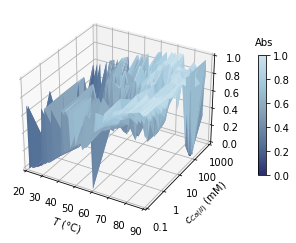

In [8]:
fig = plt.figure()
#ax = fig.gca(projection='3d') # funktioniert nicht mit neuester matplotlib-version
ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(data_CaCl2_K['Temperature (C)'], data_CaCl2_K['log_conc'], data_CaCl2_K['norm_Abs'], cmap=my_gradient_blue, linewidth=0.1)
plt.colorbar(surf, shrink=0.55, aspect=15,pad = 0.1, location='right').set_label(label='Abs',size=10, labelpad=-25, y=1.15, rotation=0)
surf.set_clim(vmin=0, vmax=1)
yticks = [-1,0, 1, 2, 3]
ylabel = ['0.1','1', '10', '100', '1000']
ax.set_yticks(yticks, labels = ylabel)
ax.set_ylim([-1,3])
ax.set_xlim([20,90])
ax.set_zlim([0,1])
plt.xlabel('$T$ (°C)')
plt.ylabel('$c_{Ca(II)}$ (mM)')
#plt.savefig(".png", dpi=600, bbox_inches="tight")
plt.show()

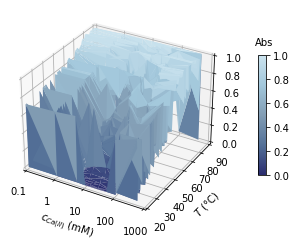

In [9]:
fig = plt.figure()
#ax = fig.gca(projection='3d') # funktioniert nicht mit neuester matplotlib-version
ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(data_CaCl2_K['log_conc'], data_CaCl2_K['Temperature (C)'], data_CaCl2_K['norm_Abs'], cmap=my_gradient_blue, linewidth=0.1)
plt.colorbar(surf, shrink=0.55, aspect=15,pad = 0.1, location='right').set_label(label='Abs',size=10, labelpad=-25, y=1.15, rotation=0)
surf.set_clim(vmin=0.0, vmax=1.0)
xticks = [-1, 0, 1, 2, 3]
xlabel = ['0.1', '1', '10', '100', '1000']
ax.set_xticks(xticks, labels = xlabel)
ax.set_xlim([-1,3])
ax.set_ylim([20,90])
ax.set_zlim([0.0,1.0])
plt.ylabel('$T$ (°C)')
plt.xlabel('$c_{Ca(II)}$ (mM)')
plt.show()

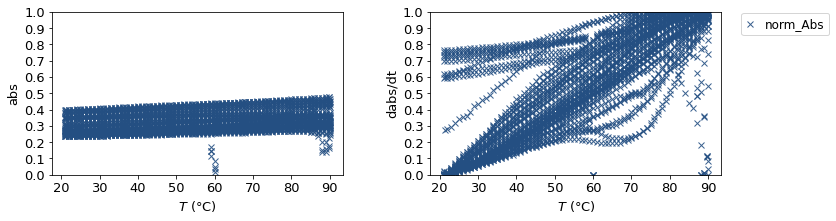

In [10]:
#f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), sharex=False, sharey=False, squeeze=False)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3), sharex=False, sharey=False, squeeze=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
temps = 8
palette = plt.get_cmap('Accent',temps)
# draw plot for the two plots
ax[0,0].scatter(data_CaCl2_K["Temperature (C)"], data_CaCl2_K["Abs"], marker='x', color=rgb_to_hex((36, 79, 130)), linewidth=1, alpha=0.9, label='abs')

ax[0,1].scatter(data_CaCl2_K["Temperature (C)"], data_CaCl2_K["norm_Abs"], marker='x', color=rgb_to_hex((36, 79, 130)), linewidth=1, alpha=0.9, label='norm_Abs')

ax[0,0].set_ylim([0.0,1])
ax[0,1].set_ylim([0.0,1.0])
ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[0,0].locator_params(axis="both", nbins=10)
ax[0,1].locator_params(axis="both", nbins=10)
ax[0,0].set_xlabel('$T$ (°C)', fontsize = 13)
ax[0,1].set_xlabel('$T$ (°C)', fontsize = 13)
ax[0,0].set_ylabel("abs", fontsize = 13)
ax[0,1].set_ylabel("dabs/dt", fontsize = 13)
plt.legend(frameon=True, handlelength=0.75, fontsize='large', loc='upper right', bbox_to_anchor=(1.39, 1.03))
#plt.savefig(".png", dpi=600, bbox_inches="tight")
#plt.savefig(".svg", dpi=600, bbox_inches="tight")
plt.show()

## Wiederholung der Messungen

In [11]:
data_II = pd.read_csv("2024-05-24_CaCl2_K_II.csv")

data_II['c (mM)'] = data_II['Name'].str.split(' ').str[0]
data_II['c (mM)'] = data_II['c (mM)'].astype(float)
data_II

,Temperature (C),Abs,Measurement,Name,norm_Abs,dabs_dt,c (mM)
0,90.000000,0.285329,5,10 mM CaCl2_260.00nm_90.0-21.0C,0.935013,-0.045704,10.0
1,89.000000,0.287492,5,10 mM CaCl2_260.00nm_90.0-21.0C,0.980717,-0.032493,10.0
2,88.000000,0.288404,5,10 mM CaCl2_260.00nm_90.0-21.0C,1.000000,-0.009073,10.0
3,87.000000,0.288351,5,10 mM CaCl2_260.00nm_90.0-21.0C,0.998863,0.008520,10.0
4,86.000000,0.287598,5,10 mM CaCl2_260.00nm_90.0-21.0C,0.982960,0.009009,10.0
...,...,...,...,...,...,...,...
1955,86.000000,0.365526,16,25 mM CaCl2_260.00nm_21.0-90.0C_R1,0.924307,0.020805,25.0
1956,87.000000,0.366964,16,25 mM CaCl2_260.00nm_21.0-90.0C_R1,0.949113,0.023761,25.0
1957,88.000000,0.368281,16,25 mM CaCl2_260.00nm_21.0-90.0C_R1,0.971830,0.017812,25.0
1958,89.000000,0.369030,16,25 mM CaCl2_260.00nm_21.0-90.0C_R1,0.984738,0.018141,25.0


In [12]:
result_II = data_II.loc[data_II['c (mM)'] == 0.1]
print(result_II)

     Temperature (C)       Abs  Measurement  \
560        90.000000  0.373091           13   
561        89.000000  0.373899           13   
562        88.000000  0.374104           13   
563        87.000000  0.374346           13   
564        86.000000  0.374083           13   
..               ...       ...          ...   
835        86.000000  0.394327           16   
836        87.000000  0.395100           16   
837        88.000000  0.395900           16   
838        89.000000  0.396646           16   
839        89.699997  0.397134           16   

                                    Name  norm_Abs   dabs_dt  c (mM)  
560     0.1 mM CaCl2_260.00nm_90.0-21.0C  0.977525 -0.014470     0.1  
561     0.1 mM CaCl2_260.00nm_90.0-21.0C  0.991994 -0.009072     0.1  
562     0.1 mM CaCl2_260.00nm_90.0-21.0C  0.995669 -0.004003     0.1  
563     0.1 mM CaCl2_260.00nm_90.0-21.0C  1.000000  0.000190     0.1  
564     0.1 mM CaCl2_260.00nm_90.0-21.0C  0.995290  0.003288     0.1  
..       

In [13]:
data_II['log_conc'] = np.log10(data_II['c (mM)'])
data_II = data_II[data_II['c (mM)'] != 0]

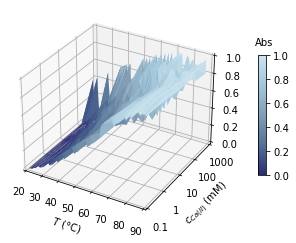

In [20]:
fig = plt.figure()
#ax = fig.gca(projection='3d') # funktioniert nicht mit neuester matplotlib-version
ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(data_II['Temperature (C)'], data_II['log_conc'], data_II['norm_Abs'], cmap=my_gradient_blue, linewidth=0.1)
plt.colorbar(surf, shrink=0.55, aspect=15,pad = 0.1, location='right').set_label(label='Abs',size=10, labelpad=-25, y=1.15, rotation=0)
surf.set_clim(vmin=0, vmax=1)
yticks = [-1,0, 1, 2, 3]
ylabel = ['0.1','1', '10', '100', '1000']
ax.set_yticks(yticks, labels = ylabel)
ax.set_ylim([-1,3])
ax.set_xlim([20,90])
ax.set_zlim([0,1])
plt.xlabel('$T$ (°C)')
plt.ylabel('$c_{Ca(II)}$ (mM)')
#plt.savefig(".png", dpi=600, bbox_inches="tight")
plt.show()

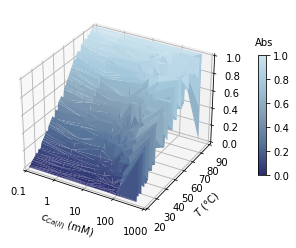

In [15]:
fig = plt.figure()
#ax = fig.gca(projection='3d') # funktioniert nicht mit neuester matplotlib-version
ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(data_II['log_conc'], data_II['Temperature (C)'], data_II['norm_Abs'], cmap=my_gradient_blue, linewidth=0.1)
plt.colorbar(surf, shrink=0.55, aspect=15,pad = 0.1, location='right').set_label(label='Abs',size=10, labelpad=-25, y=1.15, rotation=0)
surf.set_clim(vmin=0.0, vmax=1.0)
xticks = [-1, 0, 1, 2, 3]
xlabel = ['0.1', '1', '10', '100', '1000']
ax.set_xticks(xticks, labels = xlabel)
ax.set_xlim([-1,3])
ax.set_ylim([20,90])
ax.set_zlim([0.0,1.0])
plt.ylabel('$T$ (°C)')
plt.xlabel('$c_{Ca(II)}$ (mM)')
plt.show()

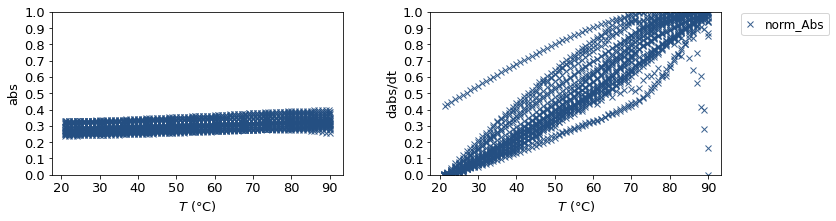

In [16]:
#f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), sharex=False, sharey=False, squeeze=False)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3), sharex=False, sharey=False, squeeze=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
temps = 8
palette = plt.get_cmap('Accent',temps)
# draw plot for the two plots
ax[0,0].scatter(data_II["Temperature (C)"], data_II["Abs"], marker='x', color=rgb_to_hex((36, 79, 130)), linewidth=1, alpha=0.9, label='abs')

ax[0,1].scatter(data_II["Temperature (C)"], data_II["norm_Abs"], marker='x', color=rgb_to_hex((36, 79, 130)), linewidth=1, alpha=0.9, label='norm_Abs')

ax[0,0].set_ylim([0.0,1])
ax[0,1].set_ylim([0.0,1.0])
ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[0,0].locator_params(axis="both", nbins=10)
ax[0,1].locator_params(axis="both", nbins=10)
ax[0,0].set_xlabel('$T$ (°C)', fontsize = 13)
ax[0,1].set_xlabel('$T$ (°C)', fontsize = 13)
ax[0,0].set_ylabel("abs", fontsize = 13)
ax[0,1].set_ylabel("dabs/dt", fontsize = 13)
plt.legend(frameon=True, handlelength=0.75, fontsize='large', loc='upper right', bbox_to_anchor=(1.39, 1.03))
#plt.savefig(".png", dpi=600, bbox_inches="tight")
#plt.savefig(".svg", dpi=600, bbox_inches="tight")
plt.show()